# Final Project: Thyroid Disease Diagnosis

>Names: Gabi Rivera, Joel Day, and Marvin Moran
>
>Date: 01Oct2023
>
>Course: ADS505

# Problem Statement
Thyroid diseases such as hypothyroidism and hyperthyroidism pose a significant health concern globally, with their prevalence on the rise. Despite being among the most common hormone imbalance diseases, there is a notable absence of proactive research and diagnostic tools to assess individual risk levels for thyroid disorders. This gap in medical research and care hinders the ability to provide timely interventions and preventative measures, resulting in individuals often seeking medical attention only after experiencing symptoms or complications. Consequently, there is a pressing need for the development of a machine learning-based predictive tool that can assess an individual's risk for thyroid disorders, thereby enabling early intervention and personalized recommendations for healthcare.

# Justification
This type of project is supported by 5 key factors. First and foremost, the prevalance for the target disease type is on the rise. In turn, classifying its variant forms as a substantial public health concern. The prevalence of these conditions is observed not only across different age groups but also in both males and females. Thus, setting a presedence of high importance and substantial humanitarian benefit in return. Second, the proactive research for the target disease type is limited. Despite the growing incidence of thyroid diseases rising, there is a significant lack of proactive research in the field. Third, such a project can greatly highlight the potential machine learning has to offer. The field of data science can transform the field of medical research as it has done for numerous other professional fields. Fourth, the potential capabilties that will result from the project (e.g., automated diagnosis) offers tremendous business opportunities. From a business perspective, such a predictive tool can be monetized through various avenues, including advertising, pharmaceutical sales related to thyroid medication, and future contract opportunities. Fifth, and ultimately, the end-result of project has the potential to greatly improve the access to healthcare for individuals. By offering individuals an easy-to-use tool to self-assess their thyroid disorder risk, they can become convinced  to seek medical attention before symptoms worsen. This could lead to earlier diagnoses and more effective treatments, ultimately improving healthcare outcomes.

## Imported Packages

In [140]:
import pandas as pd
import numpy as np
#!pip install GitPython
import git
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#!pip install dython
from dython.nominal import associations
#!pip install klib
import klib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [78]:
def download_github_repository(repo_url, destination_folder):
    try:
        git.Git(destination_folder).clone(repo_url)
        print(f"Repository successfully downloaded to {destination_folder}")
    except git.exc.GitCommandError as e:
        print(f"Error downloading the repository: {e}")

In [79]:
repo_owner = 'Riverag0011'
repo_name = 'ADS505_Team-4'
repository_url = f"https://github.com/{repo_owner}/{repo_name}"
destination_folder = "/content/sample_data"
download_github_repository(repository_url, destination_folder)

Error downloading the repository: Cmd('git') failed due to: exit code(128)
  cmdline: git clone https://github.com/Riverag0011/ADS505_Team-4
  stderr: 'fatal: destination path 'ADS505_Team-4' already exists and is not an empty directory.'


## CSV to Pandas

In [171]:
csv_name = 'thyroidDF'
df = pd.read_csv('/content/sample_data/ADS505_Team-4/Raw Data/thyroidDF.csv')
df.columns = df.columns.str.replace(' ', '_')

display(df.head())

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


## View percent of N/A, sum of N/A, and the datatype of each column

In [117]:
percent = round(df.isna().sum()/df.shape[0]*100, 1)
sum = df.isna().sum()
dtype = df.dtypes
na = pd.DataFrame({'% N/A': percent, '# N/A': sum, 'Datatype': dtype})
na

,% N/A,# N/A,Datatype
age,0.0,0,int64
sex,3.3,307,object
on_thyroxine,0.0,0,object
query_on_thyroxine,0.0,0,object
on_antithyroid_meds,0.0,0,object
sick,0.0,0,object
pregnant,0.0,0,object
thyroid_surgery,0.0,0,object
I131_treatment,0.0,0,object
query_hypothyroid,0.0,0,object


## EDA

In [82]:
dff = df.copy()

### Visualizations - MIssing Values
#### Identify missing value frequencies:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

None

GridSpec(6, 6)

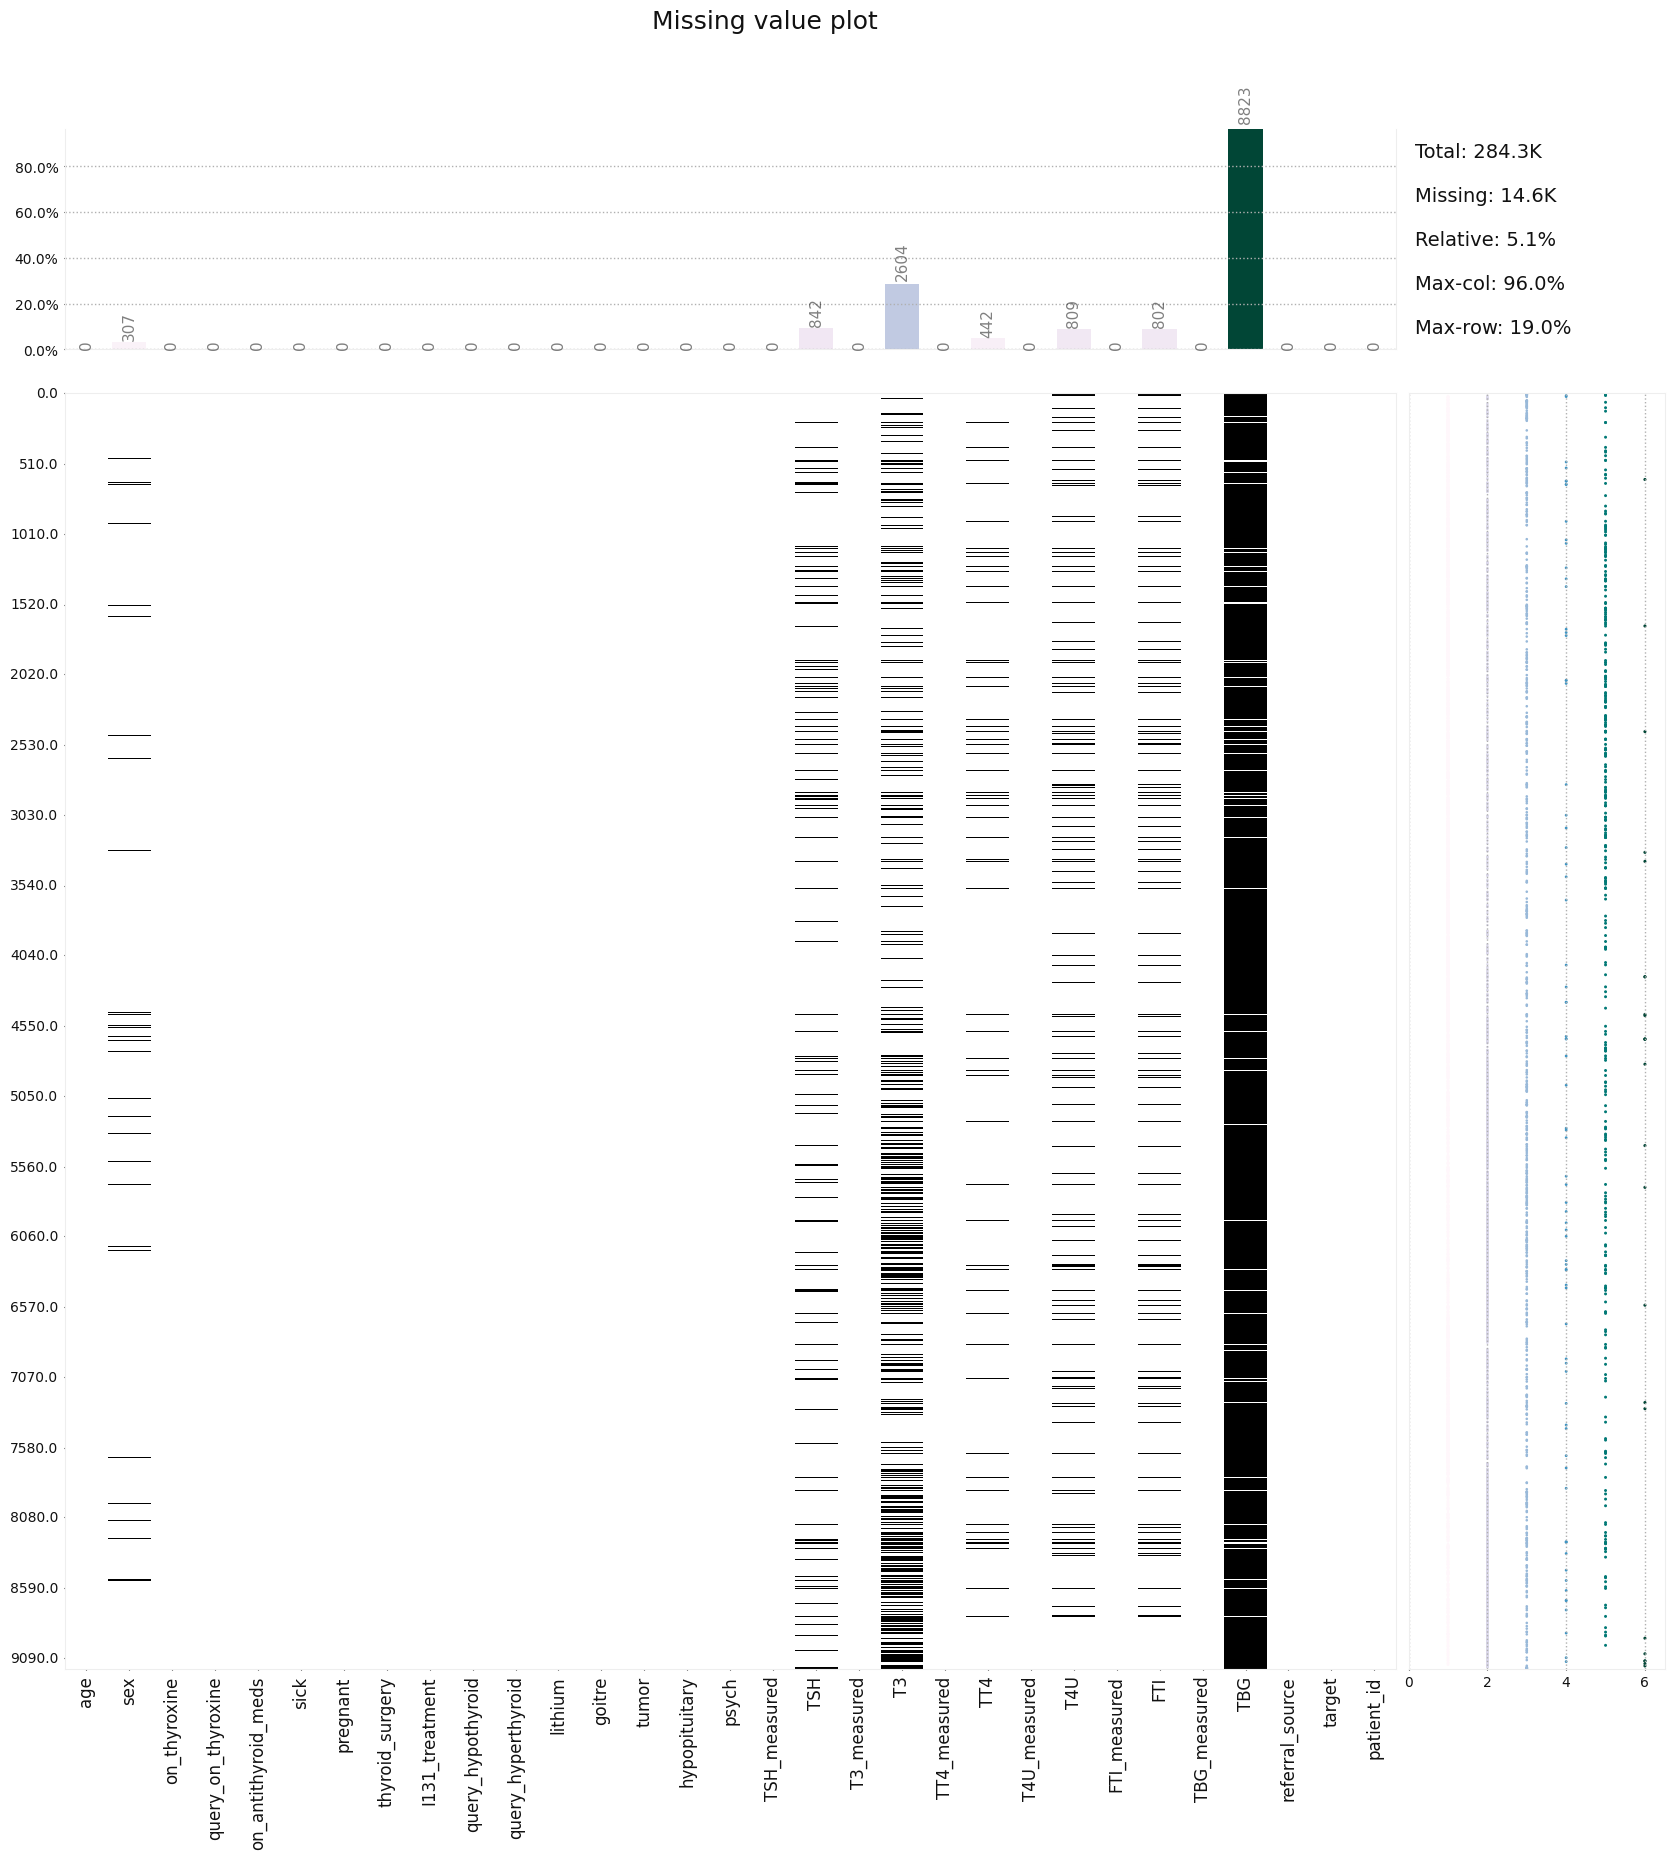

In [83]:
display(dff.info())
dff.replace('', np.nan, inplace=True)
klib.missingval_plot(dff)

### Visualizations - Numerical

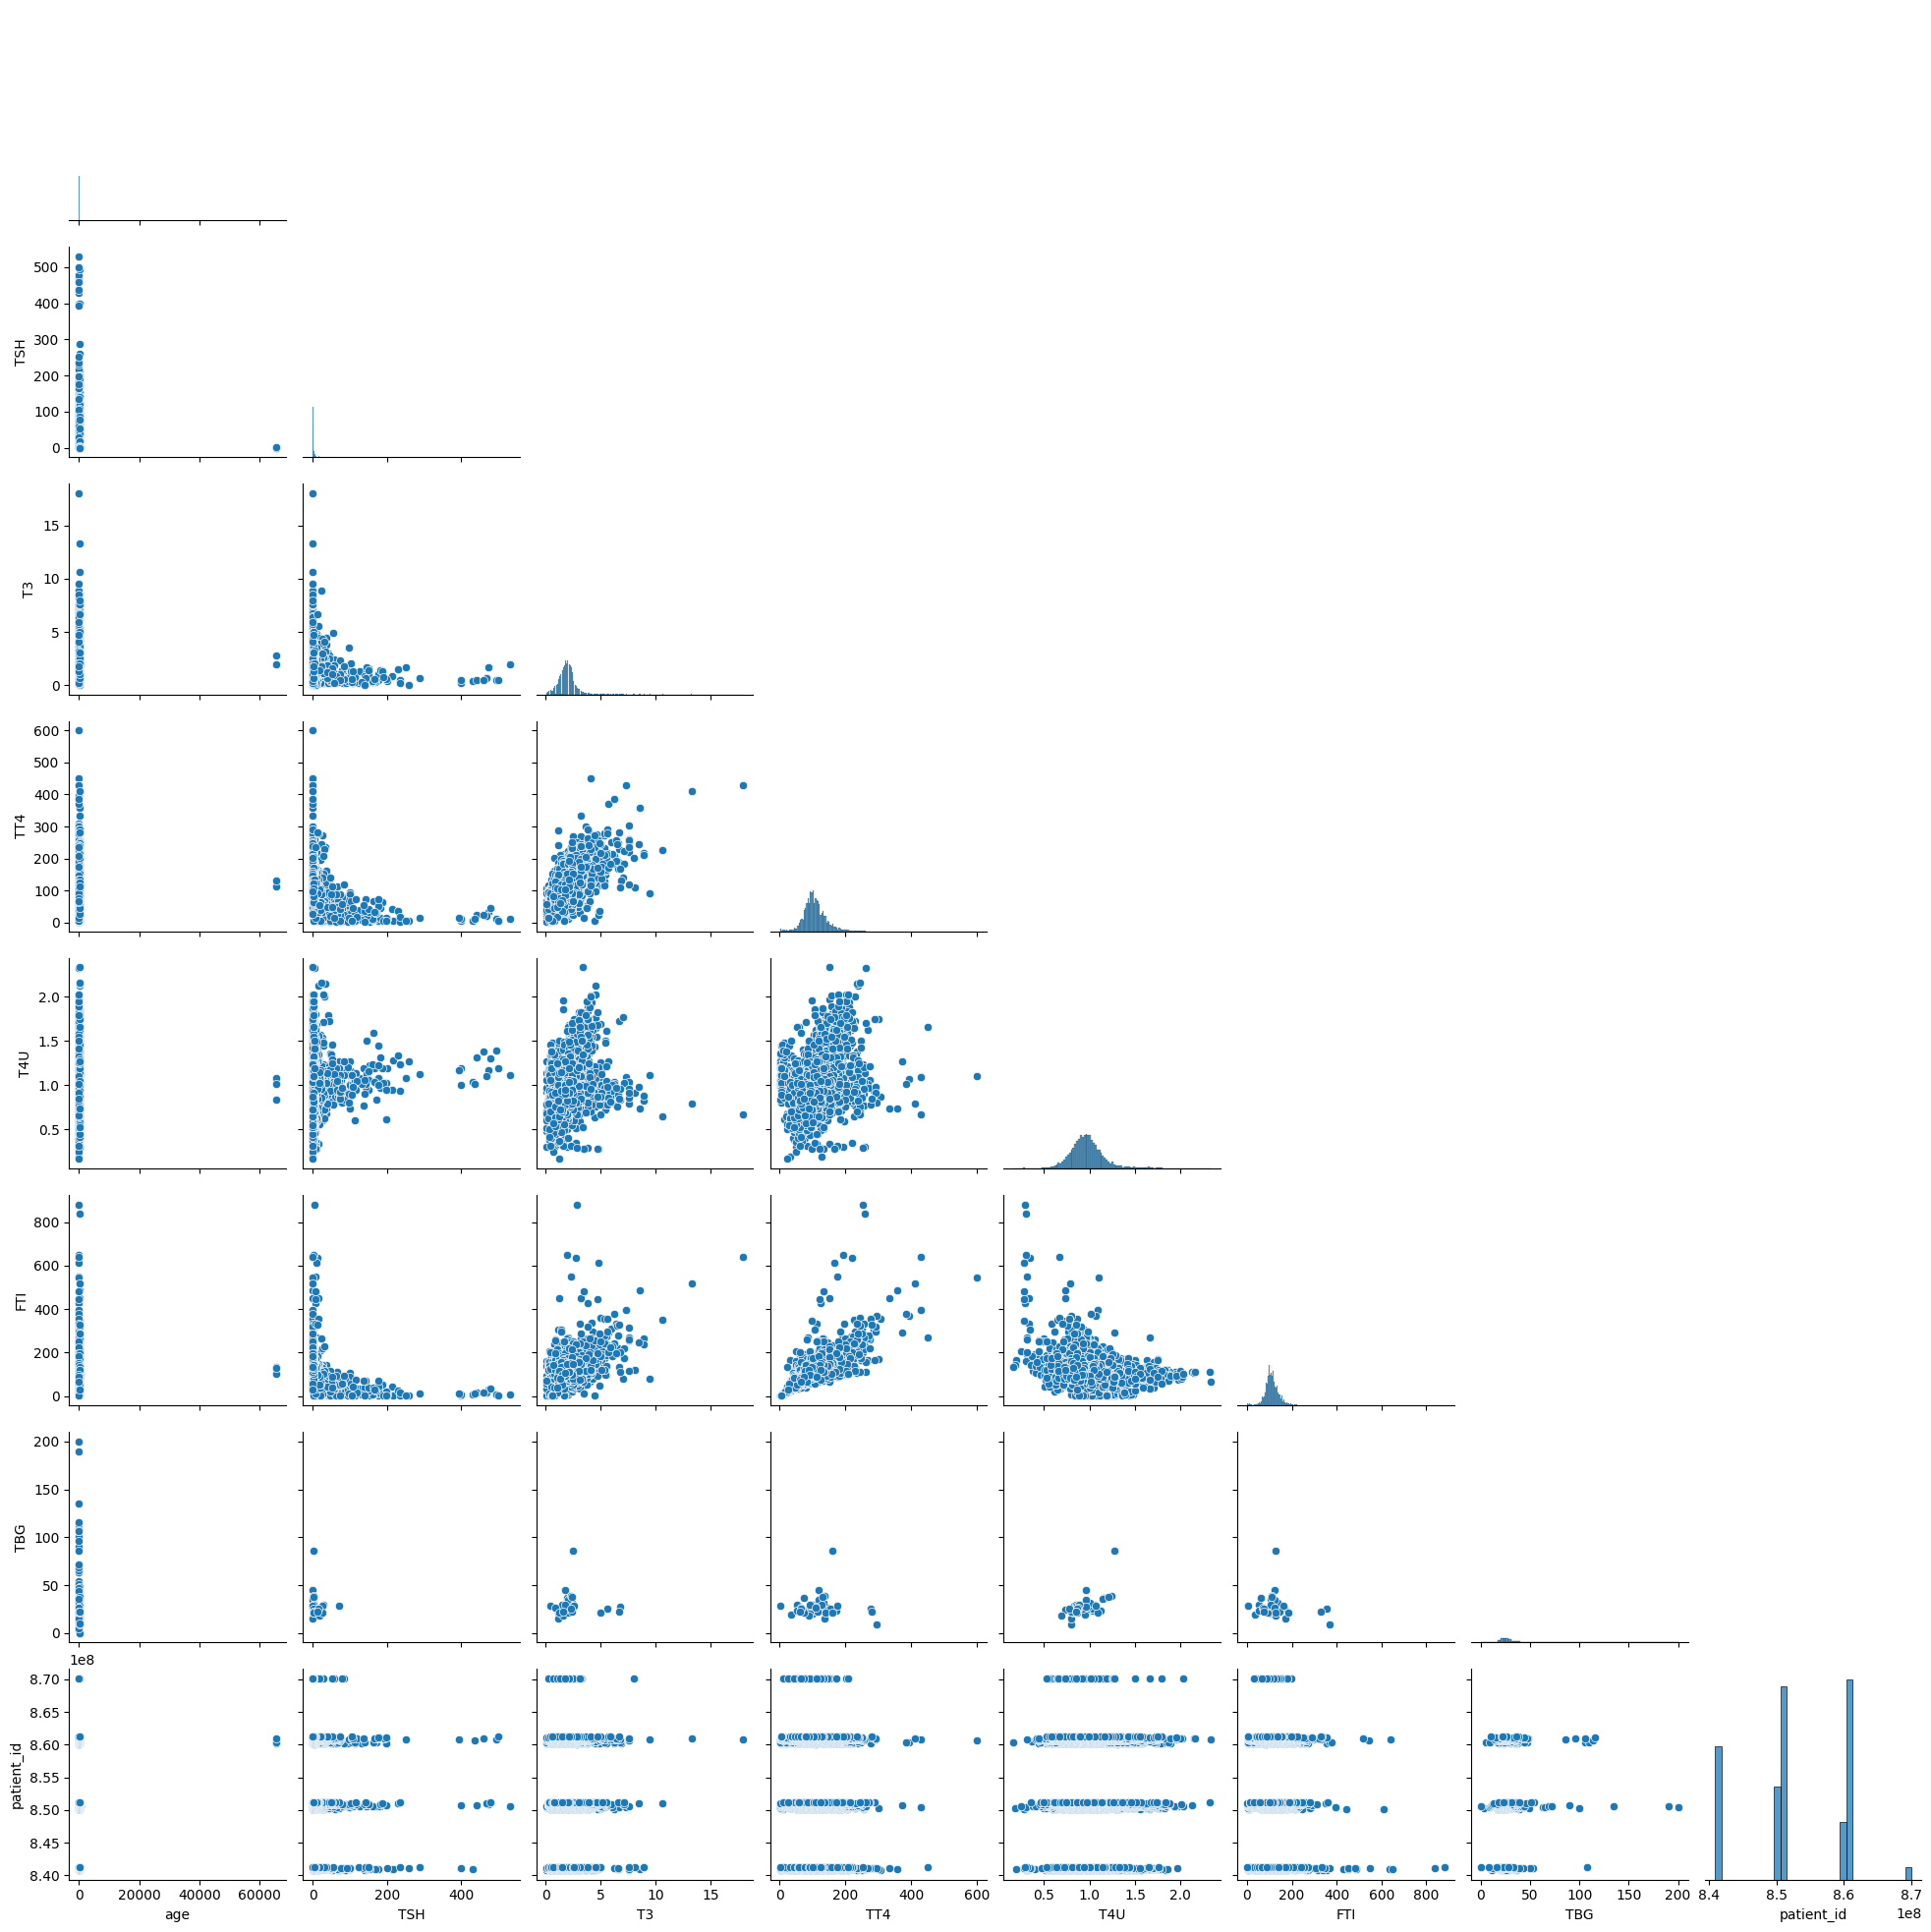

In [84]:
# General Pairplot of continues attributes:
sns.pairplot(df, corner=True)

<Axes: xlabel='age', ylabel='Density'>

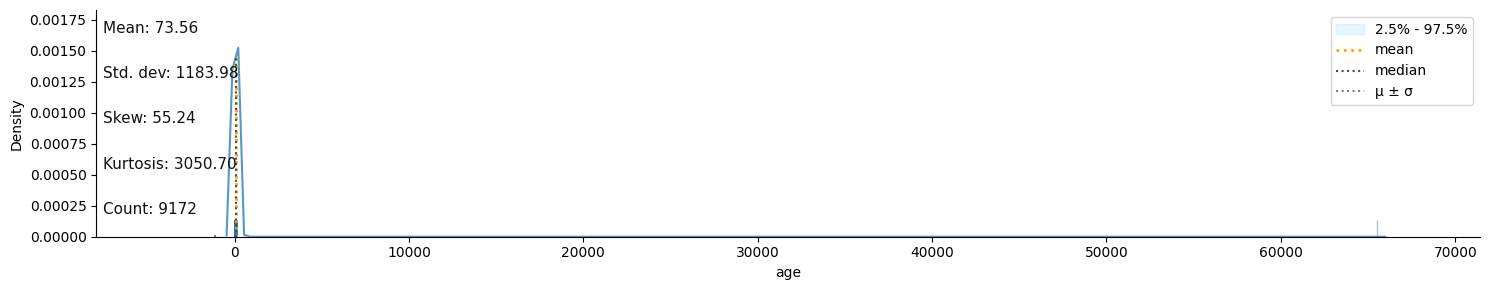

In [85]:
display(klib.dist_plot(dff))

### Visualizations - Caregorical

GridSpec(6, 23)

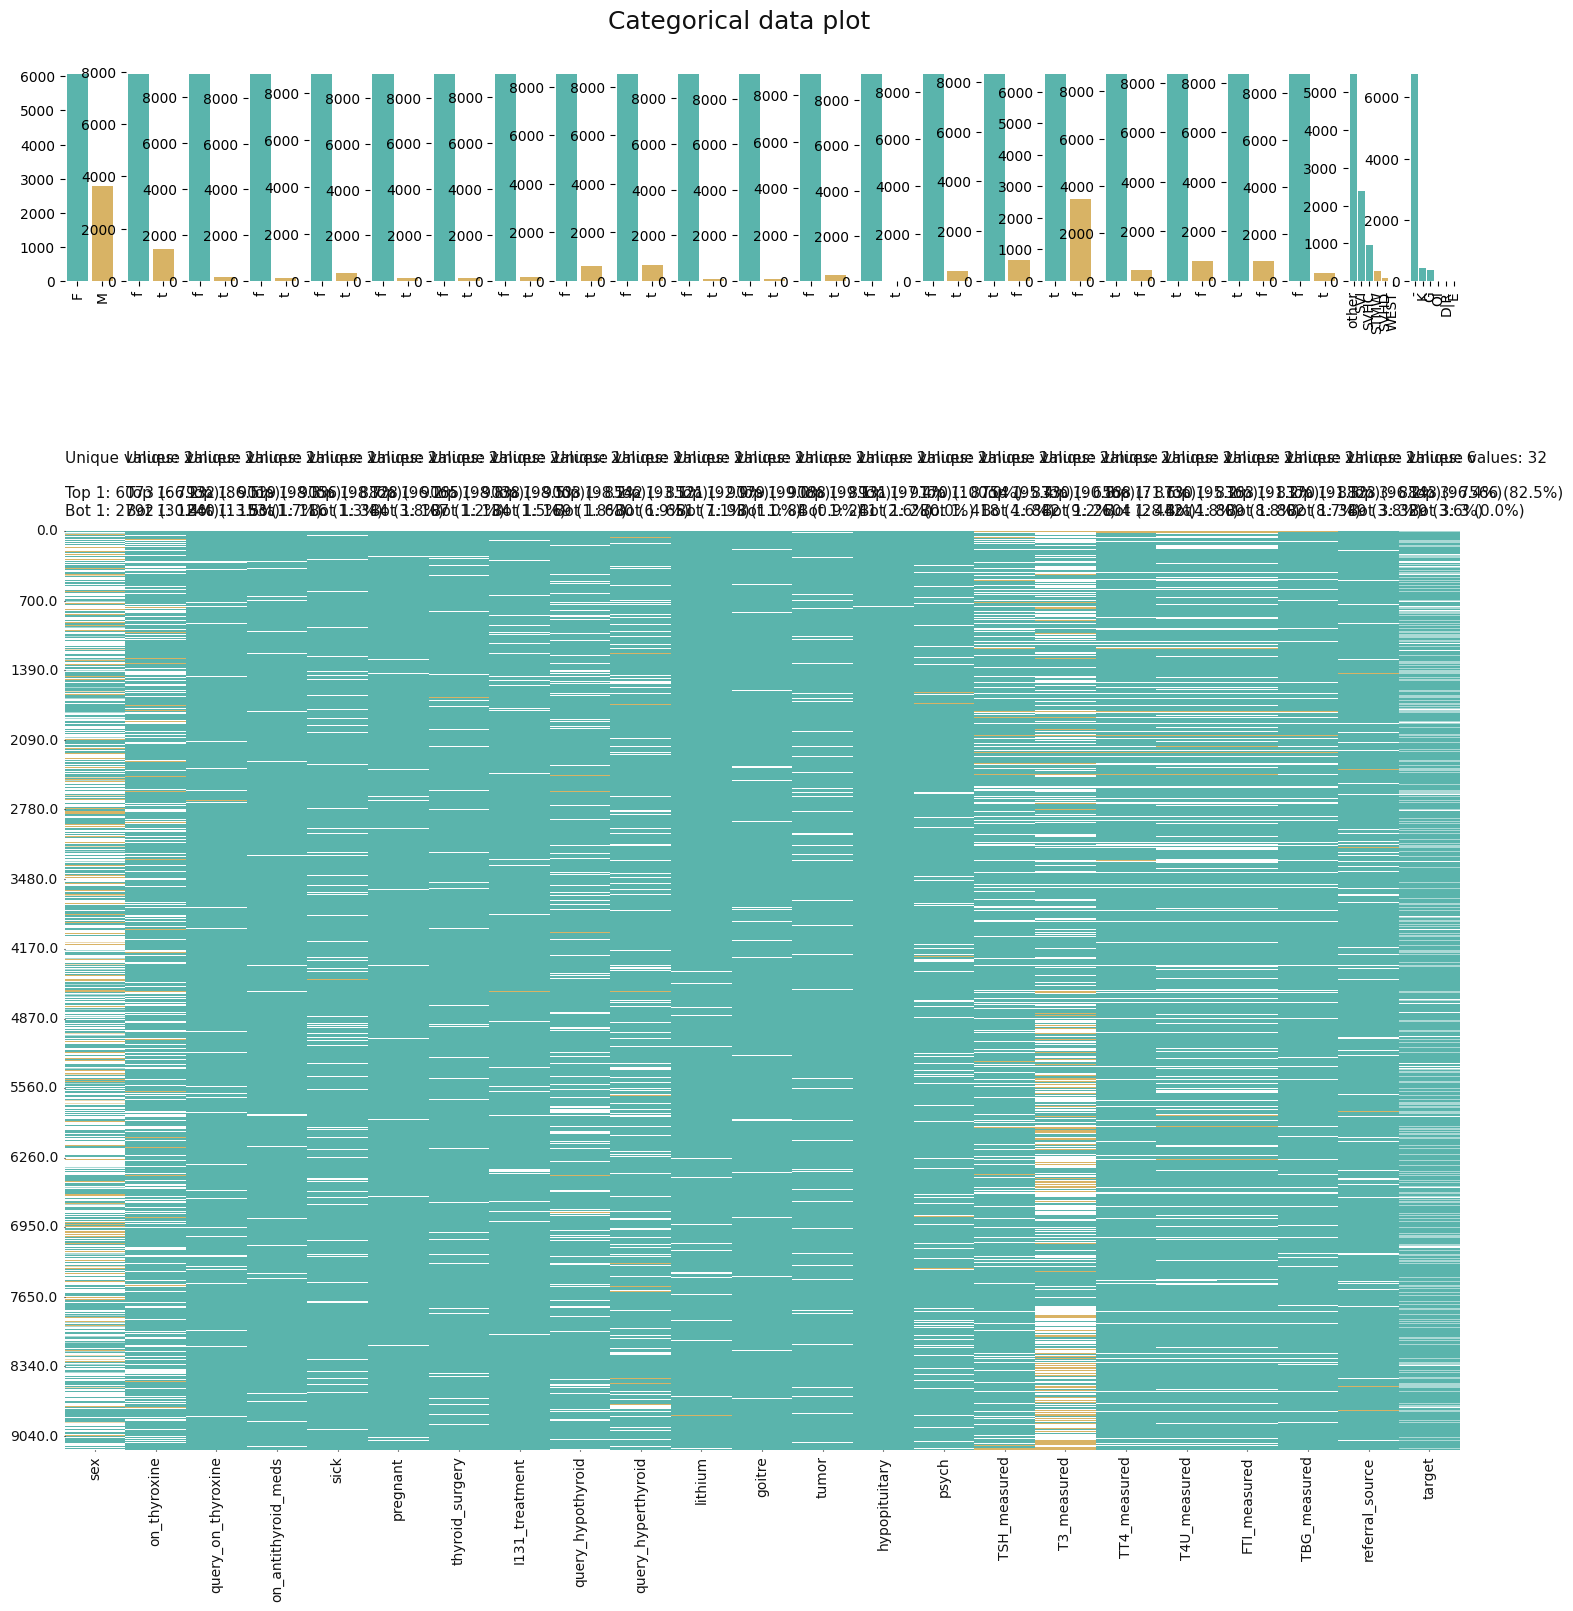

In [86]:
display(klib.cat_plot(dff))

### Measures of Centrality

In [87]:
display(df.describe())
display(df['sex'].mode())
display(df['TSH'].mode())
display(df['T3'].mode())
display(df['TT4'].mode())
display(df['T4U'].mode())
display(df['FTI'].mode())

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


0    F
Name: sex, dtype: object

0    0.1
Name: TSH, dtype: float64

0    1.8
1    2.0
Name: T3, dtype: float64

0    101.0
Name: TT4, dtype: float64

0    0.96
Name: T4U, dtype: float64

0    107.0
Name: FTI, dtype: float64

### Correlation matrix - Continuous



<Axes: title={'center': 'Feature-correlation (pearson)'}>

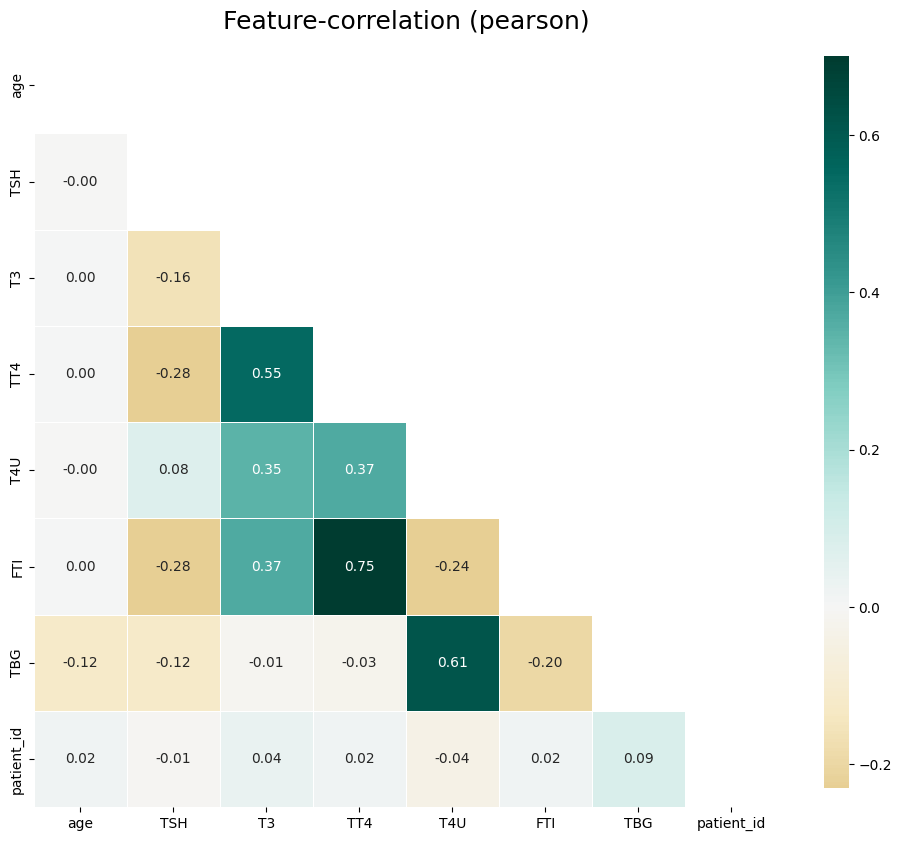

In [88]:
klib.corr_plot(df)

### Correlation matrix - Categorical

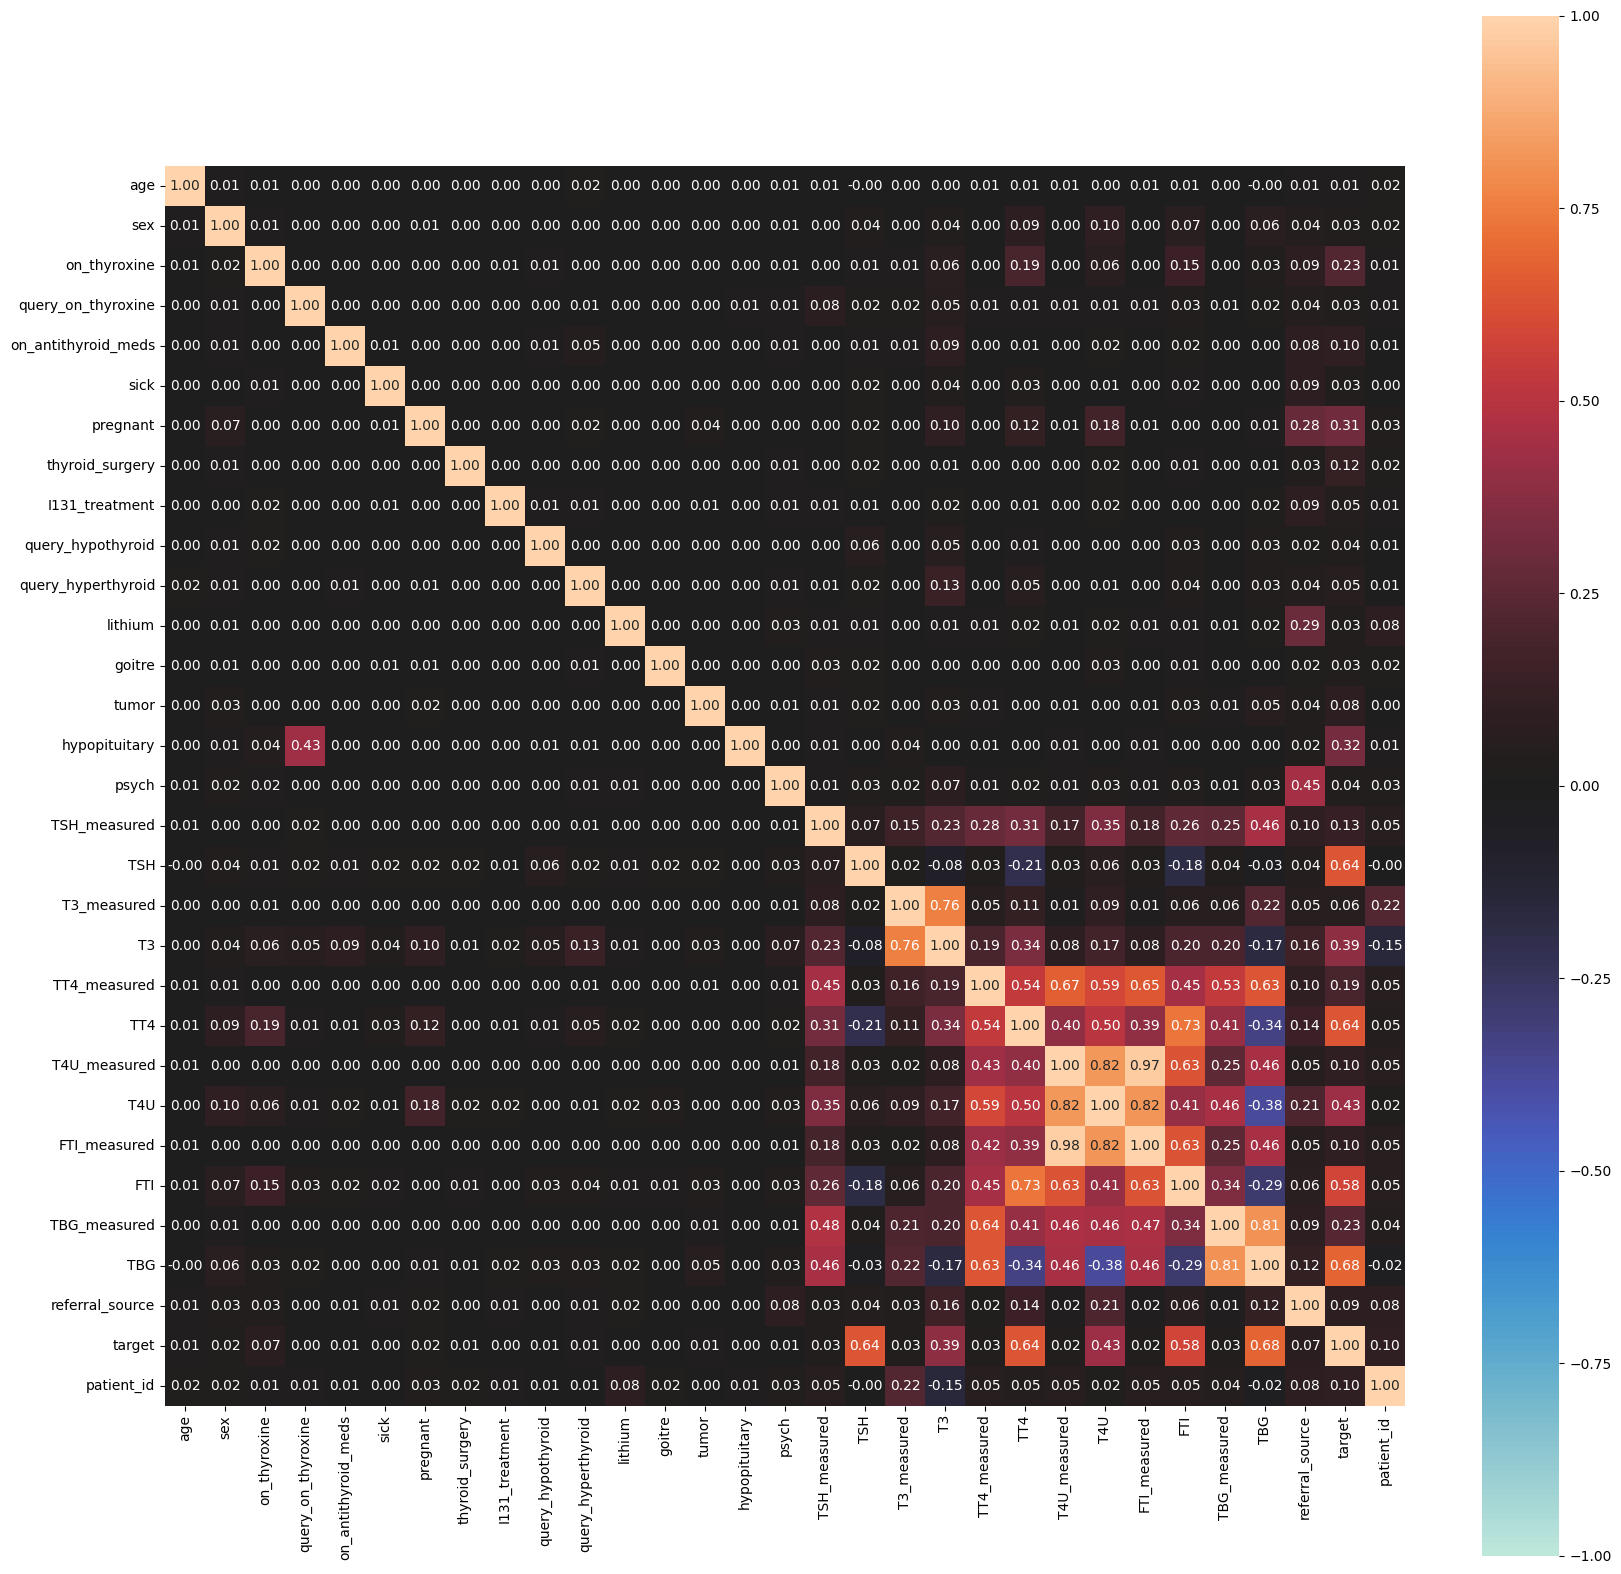

{'corr':                           age       sex  on_thyroxine  query_on_thyroxine  \
 age                  1.000000  0.014309      0.007095            0.002530   
 sex                  0.014309  1.000000      0.009057            0.001359   
 on_thyroxine         0.007095  0.017120      1.000000            0.000082   
 query_on_thyroxine   0.002530  0.011992      0.000385            1.000000   
 on_antithyroid_meds  0.002831  0.011902      0.000874            0.003156   
 sick                 0.002415  0.000302      0.008955            0.000211   
 pregnant             0.003892  0.067388      0.000815            0.001807   
 thyroid_surgery      0.002631  0.012308      0.002001            0.000175   
 I131_treatment       0.001645  0.000607      0.021638            0.003406   
 query_hypothyroid    0.004266  0.012965      0.020558            0.000538   
 query_hyperthyroid   0.017798  0.010535      0.002046            0.002474   
 lithium              0.002361  0.007548      0.000230  

In [89]:
associations(df, nom_nom_assoc = "theil", multiprocessing = True, figsize = (20,20))

## Target
## Transformation and visualization

In [172]:
# Replace target classes "-" to healthy:

df.loc[df["target"] == "-", "target"] = 'HLT'


# Combine appropriate target classes to identify hyperthyrodism:

df.loc[df["target"] == "A", "target"] = 'HeC'
df.loc[df["target"] == "B", "target"] = 'HeC'
df.loc[df["target"] == "C", "target"] = 'HeC'
df.loc[df["target"] == "D", "target"] = 'HeC'
df.loc[df["target"] == "D|R", "target"] = 'HeC'
df.loc[df["target"] == "AK", "target"] = 'HeC'
df.loc[df["target"] == "T", "target"] = 'HeC'
df.loc[df["target"] == "O", "target"] = 'HeC'
df.loc[df["target"] == "P", "target"] = 'HeC'
df.loc[df["target"] == "Q", "target"] = 'HeC'
df.loc[df["target"] == "J", "target"] = 'HeC'
df.loc[df["target"] == "LJ", "target"] = 'HeC'
df.loc[df["target"] == "KJ", "target"] = 'HeC'

df.loc[df["target"] == "L", "target"] = 'HeC'
df.loc[df["target"] == "M", "target"] = 'HeC'
df.loc[df["target"] == "MK", "target"] = 'HeC'
df.loc[df["target"] == "N", "target"] = 'HeC'


# Combine appropriate target classes to identify hypothyrodism:

df.loc[df["target"] == "E", "target"] = 'HoC'
df.loc[df["target"] == "F", "target"] = 'HoC'
df.loc[df["target"] == "FK", "target"] = 'HoC'
df.loc[df["target"] == "G", "target"] = 'HoC'
df.loc[df["target"] == "GKJ", "target"] = 'HoC'
df.loc[df["target"] == "GI", "target"] = 'HoC'
df.loc[df["target"] == "GK", "target"] = 'HoC'
df.loc[df["target"] == "H", "target"] = 'HoC'
df.loc[df["target"] == "H|K", "target"] = 'HoC'
df.loc[df["target"] == "S", "target"] = 'HoC'
df.loc[df["target"] == "I", "target"] = 'HoC'
df.loc[df["target"] == "OI", "target"] = 'HoC'
df.loc[df["target"] == "MI", "target"] = 'HoC'
df.loc[df["target"] == "C|I", "target"] = 'HoC'


# Create others bucket:

df.loc[df["target"] == "K", "target"] = 'Others'
df.loc[df["target"] == "R", "target"] = 'Others'



display(df['target'].unique)

<bound method Series.unique of 0       HLT
1       HLT
2       HLT
3       HLT
4       HoC
       ... 
9167    HLT
9168    HLT
9169    HoC
9170    HLT
9171    HLT
Name: target, Length: 9172, dtype: object>

In [173]:
y = df['target']
y

0       HLT
1       HLT
2       HLT
3       HLT
4       HoC
       ... 
9167    HLT
9168    HLT
9169    HoC
9170    HLT
9171    HLT
Name: target, Length: 9172, dtype: object

### Target Frequencies by Gender:

Text(0.5, 1.0, 'Target Frequencies by Gender')

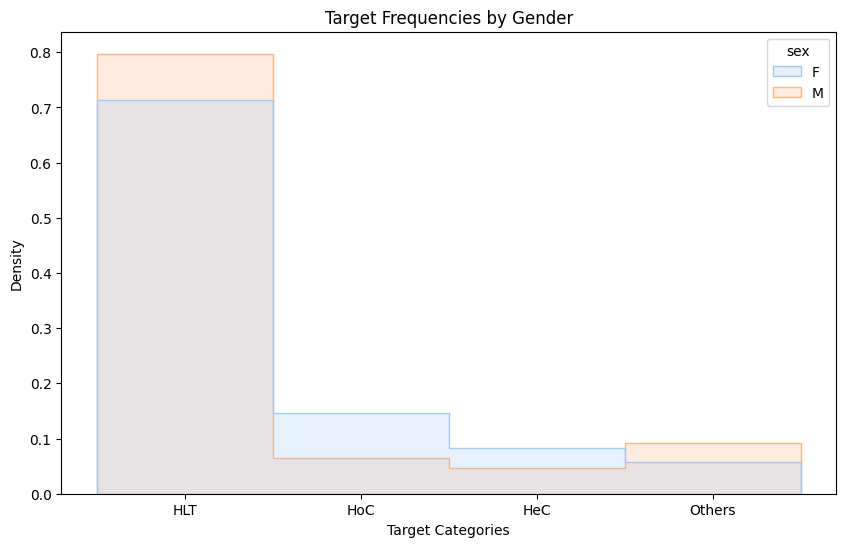

In [174]:
sns.histplot(data=df, x="target", hue="sex", stat="density",
             element="step", palette = "pastel",
             common_norm=False)

plt.gcf().set_size_inches(10, 6)
plt.xlabel('Target Categories')
plt.ylabel('Density')
plt.title("Target Frequencies by Gender")

### TT4 Relation to T4U Differentiated by target

Text(0.5, 1.0, 'TT4 Relation to T4U Differentiated by target')

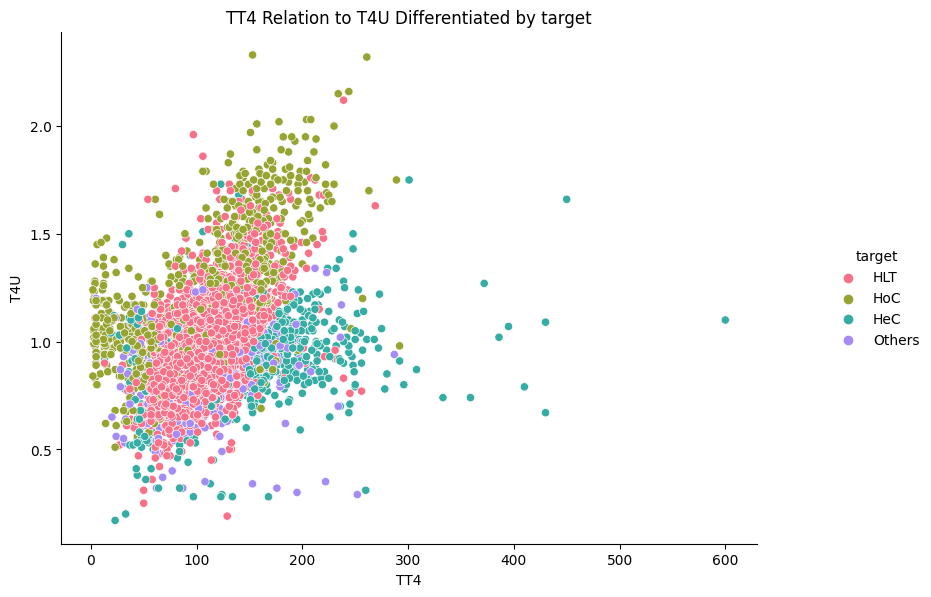

In [175]:
sns.relplot(data=df, x="TT4", y="T4U", hue="target", palette = "husl",  kind="scatter")
plt.gcf().set_size_inches(10, 6)
plt.xlabel('TT4')
plt.ylabel('T4U')
plt.title("TT4 Relation to T4U Differentiated by target")

### TSH Relation to target by Gender

Text(0.5, 1.0, 'FTI Relation to target by Gender')

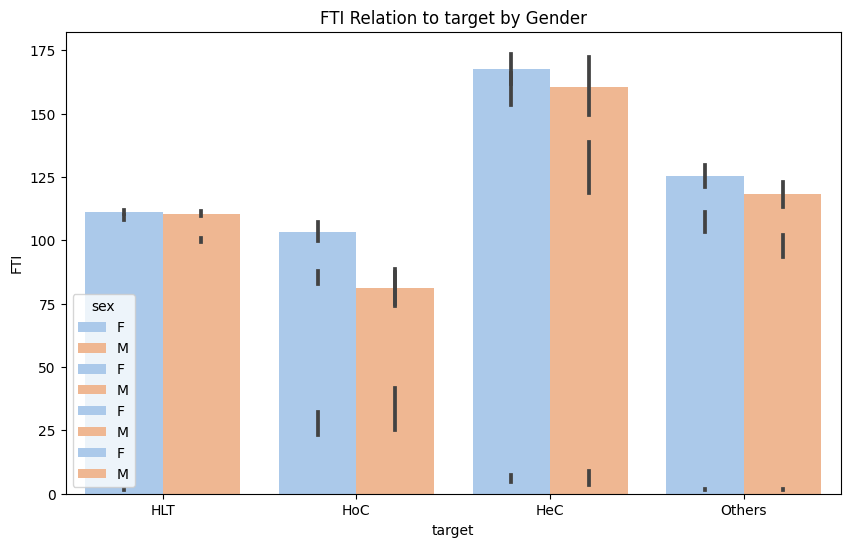

In [176]:
# TSH Relation to target by Gender

sns.barplot(data=df, x="target", y="TSH", hue="sex", palette = "pastel")
plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('TSH')
plt.title("TSH Relation to target by Gender")

# TT4 Relation to target by Gender

sns.barplot(data=df, x="target", y="TT4", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('TT4')
plt.title("TT4 Relation to target by Gender")

# T4U Relation to target by Gender

sns.barplot(data=df, x="target", y="T4U", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('T4U')
plt.title("T4U Relation to target by Gender")

# FTI Relation to target by Gender

sns.barplot(data=df, x="target", y="FTI", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('FTI')
plt.title("FTI Relation to target by Gender")

## Drop columns
### We will dop columns that have >= 40% missing values as well as those that aren't as relevant to the study
### Remove target varibale it is already stored as y.
### T4U_measured & FTI_measured are highly correlated lets drop one.

In [177]:
# Drop columns that have >= 40% missing values as well as those that aren't as relevant to the study:
df = df.drop(['TBG', 'TBG_measured', 'query_hypothyroid', 'query_hyperthyroid', 'patient_id', 'referral_source', 'target', 'T4U_measured'], axis = 1)

# Missing Values

In [178]:
# Replace attribute having <= 40% missing date with appropriate measurement of centrality:
df['sex'] = df['sex'].replace(np.nan, 'F', regex = True) #Mode
df['TSH'] = df['TSH'].replace(np.nan, '1.4', regex = True).astype(np.float64) #Median
df['T3'] = df['T3'].replace(np.nan, '1.9', regex = True).astype(np.float64) #Median
df['TT4'] = df['TT4'].replace(np.nan, '101.0', regex = True).astype(np.float64)#Mode
df['T4U'] = df['T4U'].replace(np.nan, '0.96', regex = True).astype(np.float64) #Median
df['FTI'] = df['FTI'].replace(np.nan, '107.0', regex = True).astype(np.float64) #Median

In [179]:
percent = round(df.isna().sum()/df.shape[0]*100, 1)
sum = df.isna().sum()
dtype = df.dtypes
na = pd.DataFrame({'% N/A': percent, '# N/A': sum, 'Datatype': dtype})
na

,% N/A,# N/A,Datatype
age,0.0,0,int64
sex,0.0,0,object
on_thyroxine,0.0,0,object
query_on_thyroxine,0.0,0,object
on_antithyroid_meds,0.0,0,object
sick,0.0,0,object
pregnant,0.0,0,object
thyroid_surgery,0.0,0,object
I131_treatment,0.0,0,object
lithium,0.0,0,object


# Data Types

## change age to float because it is continuous and then scale using Standard Scaler()

In [180]:
df['age'] = df['age'].astype(float)

In [181]:
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])

### 'sex' should be ant int with only 0's and 1's.

In [182]:
df['sex'].value_counts()

F    6380
M    2792
Name: sex, dtype: int64

In [183]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['sex'].value_counts()

0    6380
1    2792
Name: sex, dtype: int64

## Lets transform the rest of the boolean features in the same manner as we did for sex. They are all currently objects so lets retrive them this way and transform them all with the label encoder in a similar manner to 'sex'

In [184]:
df['on_thyroxine'].value_counts()

f    7932
t    1240
Name: on_thyroxine, dtype: int64

In [185]:
dtype_obj = df.select_dtypes(include=['object']).columns.tolist()

In [186]:
for col in dtype_obj:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [187]:
for col in dtype_obj:
  x = df[col].value_counts()
  print(x)

0    7932
1    1240
Name: on_thyroxine, dtype: int64
0    9019
1     153
Name: query_on_thyroxine, dtype: int64
0    9056
1     116
Name: on_antithyroid_meds, dtype: int64
0    8828
1     344
Name: sick, dtype: int64
0    9065
1     107
Name: pregnant, dtype: int64
0    9038
1     134
Name: thyroid_surgery, dtype: int64
0    9003
1     169
Name: I131_treatment, dtype: int64
0    9079
1      93
Name: lithium, dtype: int64
0    9088
1      84
Name: goitre, dtype: int64
0    8931
1     241
Name: tumor, dtype: int64
0    9170
1       2
Name: hypopituitary, dtype: int64
0    8754
1     418
Name: psych, dtype: int64
1    8330
0     842
Name: TSH_measured, dtype: int64
1    6568
0    2604
Name: T3_measured, dtype: int64
1    8730
0     442
Name: TT4_measured, dtype: int64
1    8370
0     802
Name: FTI_measured, dtype: int64


## regroup

In [188]:
percent = round(df.isna().sum()/df.shape[0]*100, 1)
sum = df.isna().sum()
dtype = df.dtypes
na = pd.DataFrame({'percent': percent, 'sum': sum, 'datatype': dtype})
na

,percent,sum,datatype
age,0.0,0,float64
sex,0.0,0,int64
on_thyroxine,0.0,0,int64
query_on_thyroxine,0.0,0,int64
on_antithyroid_meds,0.0,0,int64
sick,0.0,0,int64
pregnant,0.0,0,int64
thyroid_surgery,0.0,0,int64
I131_treatment,0.0,0,int64
lithium,0.0,0,int64


## Redundant?
### Due to the presecnce of na values and the redududancy of information the following 6 columns will be dropped.

## Lets talk about his but keep all of them for now. I messged in the chat about a week ago without any feedback.

In [189]:
#columns_to_drop = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
#df_numeric = df.drop(columns=columns_to_drop).copy()

# Final DF

In [190]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,lithium,...,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U,FTI_measured,FTI
0,-0.037634,0,0,0,0,0,0,0,0,0,...,0,1,0.3,0,1.9,0,101.0,0.96,0,107.0
1,-0.037634,0,0,0,0,0,0,0,0,0,...,0,1,1.6,1,1.9,1,128.0,0.96,0,107.0
2,-0.027499,0,0,0,0,0,0,0,0,0,...,0,0,1.4,0,1.9,0,101.0,0.96,0,107.0
3,-0.031722,0,0,0,0,0,0,0,0,0,...,0,0,1.4,0,1.9,0,101.0,0.96,0,107.0
4,-0.035100,0,0,0,0,0,0,0,0,0,...,0,0,1.4,0,1.9,0,101.0,0.96,0,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,-0.014829,1,0,0,0,0,0,0,0,0,...,0,0,1.4,0,1.9,1,64.0,0.83,1,77.0
9168,-0.043547,1,0,0,0,0,0,0,0,0,...,0,0,1.4,0,1.9,1,91.0,0.92,1,99.0
9169,-0.003848,1,0,0,0,0,0,0,0,0,...,0,0,1.4,0,1.9,1,113.0,1.27,1,89.0
9170,-0.022431,0,0,0,0,0,0,0,0,0,...,0,0,1.4,0,1.9,1,75.0,0.85,1,88.0


# Split

In [191]:
X = df.copy()
X.shape

(9172, 23)

In [192]:
np.random.seed(22)
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.4)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, train_size=700/1200)
print("X_train shape:", X_train.shape, "X_valid shape:", X_valid.shape, "X_test shape:", X_test.shape)

X_train shape: (3668, 23) X_valid shape: (3210, 23) X_test shape: (2294, 23)


In [193]:
print("y_train shape:", y_train.shape, "y_valid shape:", y_valid.shape, "y_test shape:", y_test.shape)

y_train shape: (3668,) y_valid shape: (3210,) y_test shape: (2294,)


In [194]:
y_train

7189       HLT
6587       HLT
8999       HLT
6935       HLT
5888       HLT
         ...  
4587       HLT
6646       HLT
5478    Others
8548       HLT
6276       HLT
Name: target, Length: 3668, dtype: object